In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
X = data.drop(['DEATH_EVENT'], axis=1)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
kmeans_4_clusters = KMeans(n_clusters=4, random_state=42)
kmeans_4_clusters.fit(X_scaled)

data['Cluster_4'] = kmeans_4_clusters.labels_

print(data.head())

print(data['Cluster_4'].value_counts())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  Cluster_4  
0        0     4            1          3  
1        0     6  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

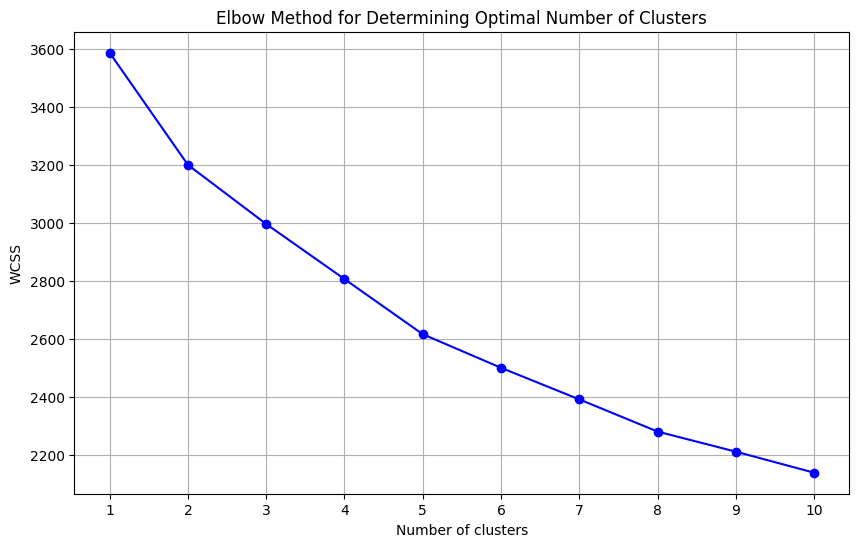

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


The elbow method plot shows how the within-cluster sum of squares (WCSS) changes as we increase the number of clusters. The "elbow" point on the plot is where the reduction in WCSS begins to slow down, suggesting that adding more clusters beyond this point doesn't provide much better modeling of the data.

Looking at the plot, the elbow seems to appear around 2-4 clusters, indicating that this range might be optimal for our dataset. For a clearer decision, we could pick 3 as a middle ground for further analysis, balancing between model complexity and clustering granularity.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


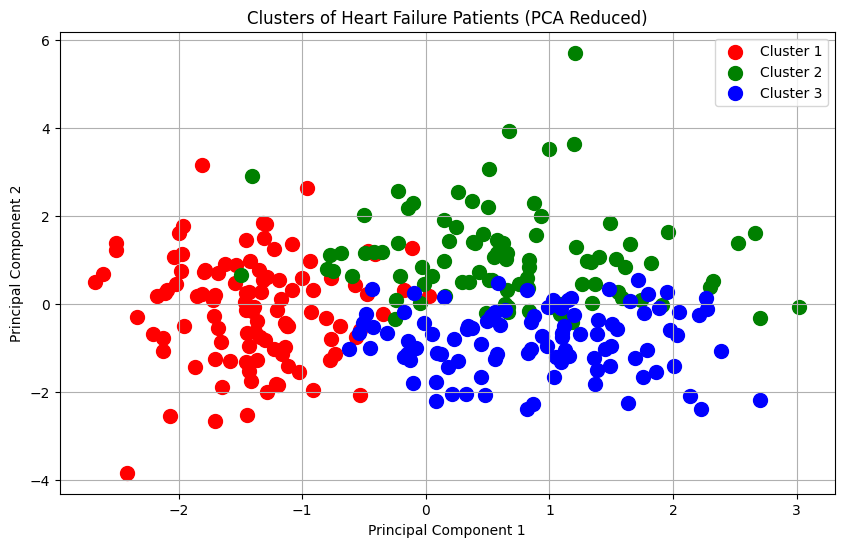

In [15]:
# Clustering with the chosen optimal number of clusters (3 in this case)
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_scaled)

# Applying PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(optimal_clusters):
    plt.scatter(X_pca[kmeans_optimal.labels_ == i, 0], X_pca[kmeans_optimal.labels_ == i, 1],
                s = 100, c = colors[i], label = f'Cluster {i+1}')
plt.title('Clusters of Heart Failure Patients (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


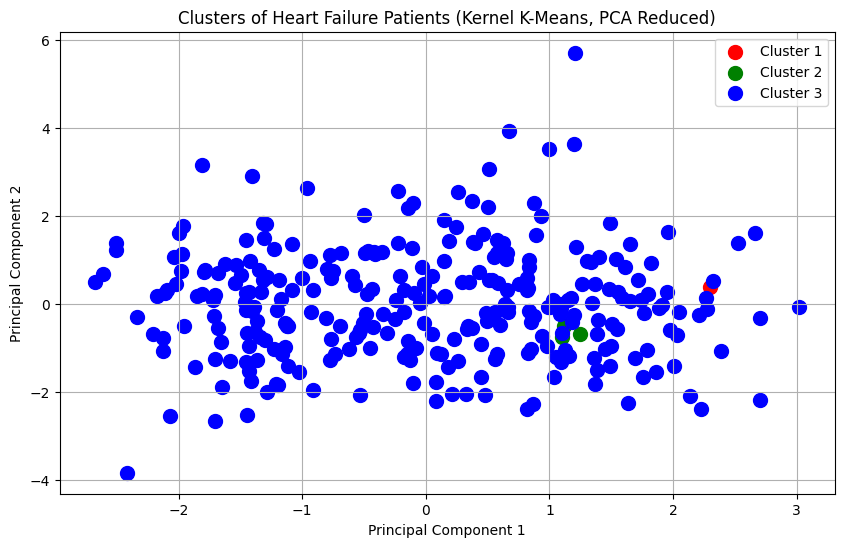

In [16]:


# Applying RBF kernel transformation to the standardized data
gamma = 15
X_kernel = rbf_kernel(X_scaled, gamma=gamma)

# Applying K-Means to the kernel-transformed data
kmeans_kernel = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_kernel.fit(X_kernel)

#mapping the original data points to a 2D space for visualization
X_pca_kernel = pca.transform(X_scaled)

# Visualizing the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca_kernel[kmeans_kernel.labels_ == i, 0], X_pca_kernel[kmeans_kernel.labels_ == i, 1],
                s = 100, c = colors[i], label = f'Cluster {i+1}')
plt.title('Clusters of Heart Failure Patients (Kernel K-Means, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


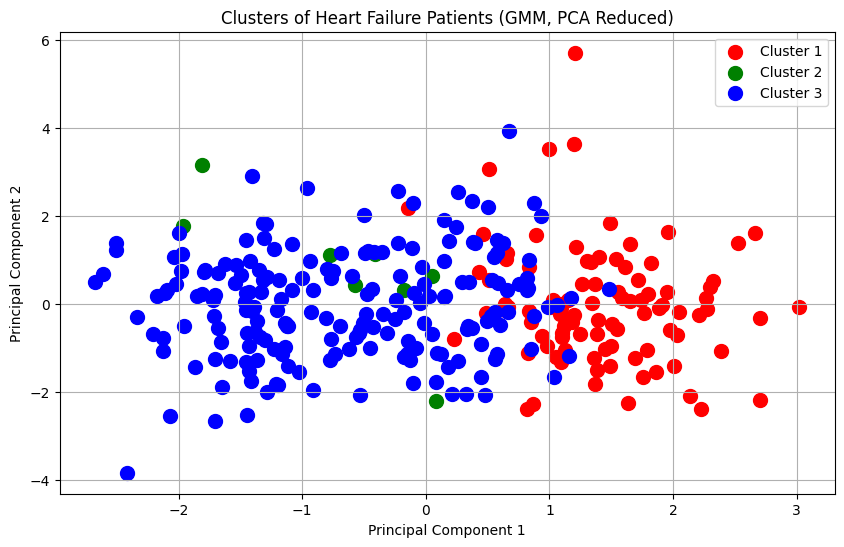

In [17]:
# Applying Gaussian Mixture Model (GMM) for clustering with the chosen optimal number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_scaled)

# Predicting the cluster for each data point
gmm_labels = gmm.predict(X_scaled)

# Visualizing the GMM clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[gmm_labels == i, 0], X_pca[gmm_labels == i, 1],
                s = 100, c = colors[i], label = f'Cluster {i+1}')
plt.title('Clusters of Heart Failure Patients (GMM, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Here's a comparative analysis of these three clustering methods based on the visualized PCA-reduced data:

### K-Means Clustering
- **Separability**: The clusters appear relatively distinct, with clear separation between them. This indicates that K-Means, which assumes clusters are spherical and of similar size, was able to find well-defined groups in the data.
- **Shape and Size**: The clusters tend to be circular because PCA preserves global distances and K-Means enforces spherical shapes in the feature space.
- **Outliers**: There are a few points that seem to be positioned away from the cluster centers. K-Means can be sensitive to such outliers, which might affect the positioning of the centroids.

### Kernel K-Means Clustering
- **Separability**: The clusters appear less distinct than in standard K-Means, with one dominant red cluster. This suggests that the kernel transformation might have over-emphasized the density of this particular group in the feature space.
- **Shape and Size**: Similar to K-Means, clusters tend to maintain a round shape due to PCA projection; however, their distribution might be more spread out due to the non-linear transformation applied by the RBF kernel.
- **Outliers**: The impact of outliers is less evident here, possibly because the kernel transformation mitigates their effect by projecting the data into a higher-dimensional space where the clusters are more separable.

### EM Clustering with GMM
- **Separability**: There's a more considerable overlap between clusters, particularly noticeable between the green and red clusters. This overlap suggests that GMM recognized a more nuanced structure in the data, capturing areas where clusters are not clearly separable.
- **Shape and Size**: The clusters are ellipsoidal and of different sizes, which is expected as GMM accommodates clusters with varying shapes and covariances.
- **Outliers**: GMM does not rigidly assign points to clusters but rather provides probabilities that a point belongs to each cluster.

In [18]:
# Preparing the features and the target variable for the analysis
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the silhouette score to find the optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# The optimal number of clusters is the one with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original data for analysis
data['Cluster'] = kmeans_labels

#analyzing the clusters in terms of 'DEATH_EVENT'
cluster_death_event_analysis = data.groupby('Cluster')['DEATH_EVENT'].agg(['mean', 'count']).reset_index()

#results
optimal_n_clusters, silhouette_scores, cluster_death_event_analysis


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(4,
 [0.13299815115632735,
  0.15369446446459306,
  0.1599613726672895,
  0.13742711858089204,
  0.1163816617126863,
  0.12996108477165913,
  0.1138148124165412,
  0.1361932495508935,
  0.1304518552490246],
    Cluster      mean  count
 0        0  0.500000      8
 1        1  0.300971    103
 2        2  0.464286     84
 3        3  0.211538    104)